# Demonstration of Portfolio Visualization

## Import packages

In [1]:
from Portfolio import Portfolio # this is what I worked on!

import quandl
import pandas as pd
import numpy as np
import itertools
import textwrap

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

In [ ]:
# Set plotting style for additional plots below
sns.set(context='talk',
        style='ticks',
        font_scale=0.8,
        palette='colorblind', 
        rc={# 'axes.xmargin':0.02,
            'lines.linewidth': 2,
            'patch.edgecolor': 'black',  
            'patch.linewidth': 1,
            'axes.spines.left': True, 
            'axes.spines.right': True,
            'axes.spines.top': True,
            'axes.spines.bottom': True})

## Load pickled data

I will be using a pickled dataset of end of day prices from my master's thesis. 

In [3]:
df = pd.read_pickle('Sharadar')
# pmfg_centrality = pd.read_pickle('ordered_PMFG_nodes')

df.head(3)

ticker,EW,AAPL,GGP,SWKS,CCL,MO,BLL,ZTS,ETN,CF,...,BF.B,ABC,DIS,WAT,LOW,RCL,WMB,TJX,EFX,XRAY
date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,12.000,14.687,15.24,16.82,32.96,28.56,18.160,31.01,45.49,30.762,...,21.496,38.07,38.31,75.94,25.52,25.90,26.82,15.928,38.83,35.38
2012-01-04,11.807,14.766,14.88,16.78,33.22,28.40,18.125,31.01,45.48,31.598,...,21.141,38.20,38.85,74.45,26.47,26.12,26.98,16.108,38.43,35.37
2012-01-05,11.992,14.930,15.00,17.28,33.27,28.83,18.135,31.01,45.66,31.932,...,21.067,38.49,39.50,73.71,26.37,26.00,27.55,16.578,38.42,35.40


## Portfolio demo

**This is a work in progress. I am looking to add more useful metrics like tracking error. I also have an empty plot that I need to fill. Some possible visualizations are considered below.**

In [4]:
port = Portfolio().Fit(df, start_date='2015') #, end_date='2020')

In [5]:
# See stock universe
port.universe[:3]

ticker,EW,AAPL,GGP,SWKS,CCL,MO,BLL,ZTS,ETN,CF,...,BF.B,ABC,DIS,WAT,LOW,RCL,WMB,TJX,EFX,XRAY
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,21.287,27.332,28.55,73.32,45.61,48.97,34.155,43.31,67.93,55.580,...,35.300,90.46,93.75,113.88,67.70,82.95,45.22,33.980,81.32,51.93
2015-01-05,21.297,26.563,28.74,72.13,45.39,48.69,33.410,43.05,65.12,55.390,...,35.108,89.69,92.38,113.02,66.08,81.71,43.43,33.600,80.64,51.57
2015-01-06,21.170,26.565,29.15,69.83,45.83,48.98,32.845,42.63,64.39,56.536,...,34.916,90.18,91.89,112.53,66.23,81.95,42.84,33.435,80.00,50.93


In [6]:
# Gets S&P500 as benchmark unless specified otherwise in Fit().
port.benchmark[:3]

,SP500
Date,
2015-02-01,2308.47
2015-03-01,2292.38
2015-04-01,2304.08


### Build portfolios with random 30 stocks

In [7]:
basket_size = 30

# Subset 30 stocks from stock universe
sample1 = df.sample(basket_size, axis=1)

# Build portfolio. Uses equal weights if not specified. 
# Calculates monthly returns and vol. Other options are daily, quarterly, yearly
random_port1 = port.Build(tickers=sample1.columns, name='random1', sampling='M')

In [8]:
# List of events and dates to plot 
stress_events = {'Covid19': '2020-03-01',
                'Brexit\nintro': '2016-02-22',
                'Brexit vote': '2016-06-23',
                'Feb crash': '2018-02-05'}

Jan 03, 2012 - Dec 10, 2020


,random1,benchmark
sharpe,0.39,0.68
annualized_returns,6.89%,8.39%
volatility,17.46%,12.38%
max drawdown,-46.40%,-27.41%


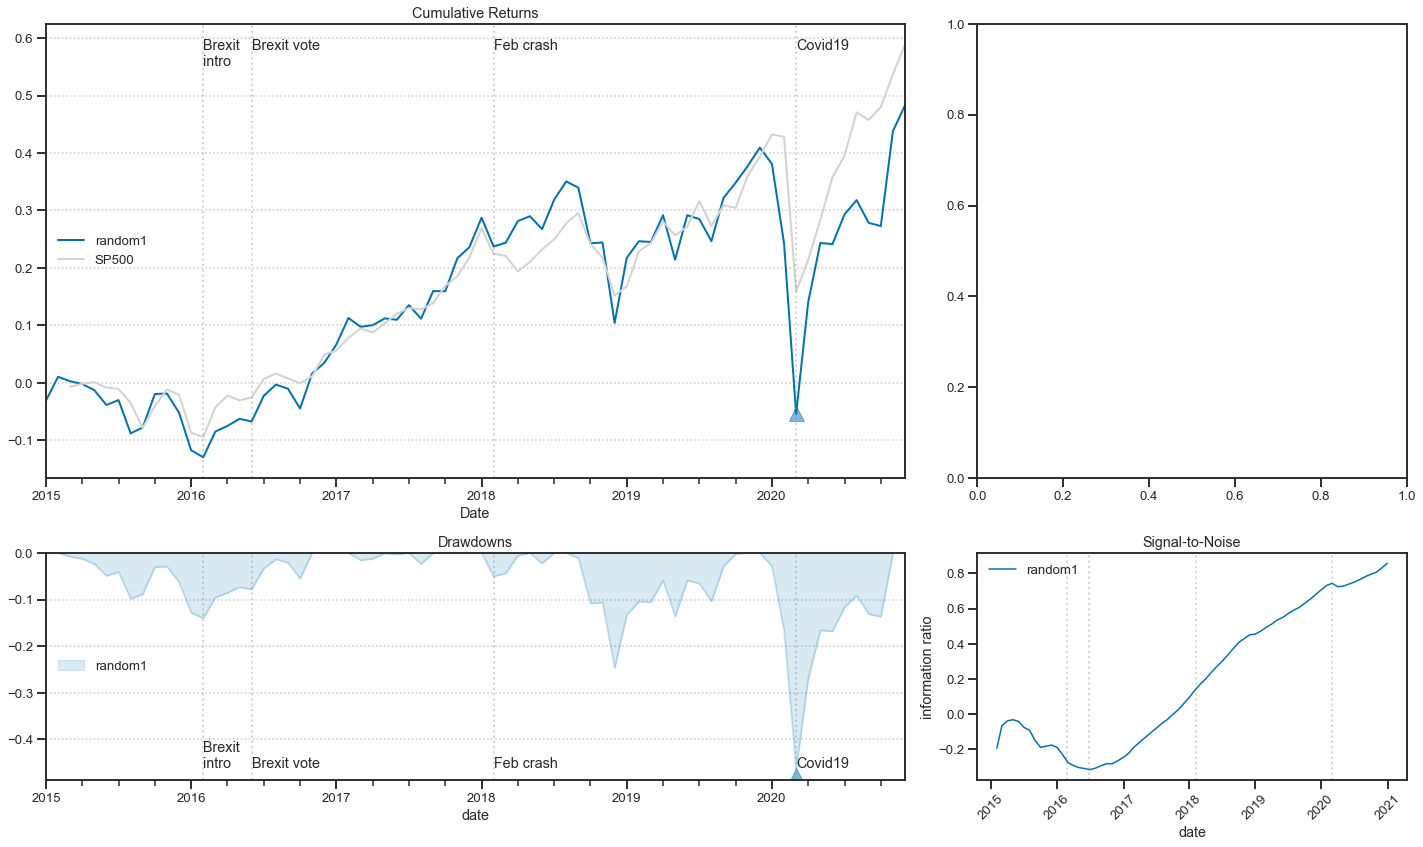

In [9]:
# Show start and end date of observation (I should include this as part of Portfolio())
date_fmt = '%b %d, %Y'
print('{} - {}'.format(df.index[0].strftime(date_fmt), df.index[-1].strftime(date_fmt)))

# Plot performance and show metrics
port.Summary(portfolios=[random_port1], plot=True, benchmark=True, stress_events=stress_events)

### Simple optimization of sample portfolio

In [10]:
random_vol_port1 = port.Build(tickers=sample1.columns, name='random_vol1', sampling='M',
                                 optimize_by='sharpe', lower_bound=0.01, upper_bound=0.2)

,random1,random_vol1,benchmark
sharpe,0.39,1.25,0.68
annualized_returns,6.89%,17.18%,8.39%
volatility,17.46%,13.74%,12.38%
max drawdown,-46.40%,-45.47%,-27.41%


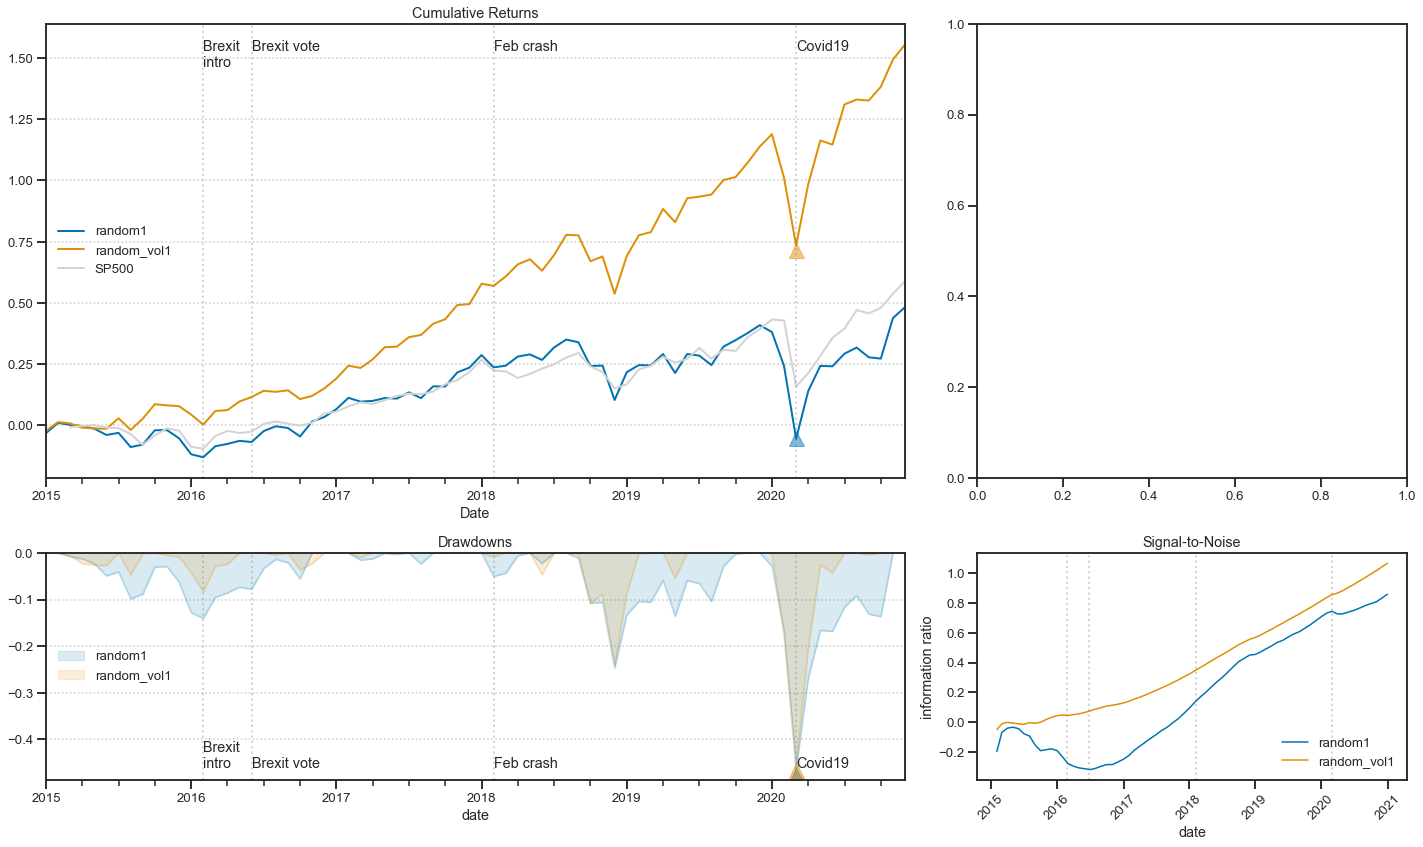

In [11]:
port.Summary(portfolios=[random_port1, random_vol_port1], plot=True, benchmark=True, stress_events=stress_events)

## Ideas for upper right plot

In [12]:
def label(col_label):
    
    for i,txt in enumerate(col_label):
        
        if col_label[i] >= 0:
            offset = 10
            ## text_color = text_palette[-1] # '#355749'
        else:
            offset = -15
            ## text_color = text_palette[0] # '#A41034'
            
        plt.annotate('{:.2f}'.format(txt), # * 100
                     xy=(i, col_label[i]),
                     xytext=(0, offset),
                     textcoords='offset points',
                     va='center', ha='center') ## , c=text_color)

In [15]:
def plot_allocation(portfolio_result, n=5):
    
    stocks = portfolio_result['assets']
    ws = portfolio_result['weights']
    
    # current_ws = portfolio_result['current_weights']
    # diff_ws = current_ws - ws
    
    n_ind = np.argpartition(ws, -n)[-n:]
    
    ws_largest = ws[n_ind]
    stock_largest = stocks[n_ind]
    
    plt.figure(figsize=(16,7))
    sns.barplot(x=stock_largest, y=ws_largest, palette='Set2')
    
    label(ws_largest)
    
    plt.title('Top {} Weighted Stocks'.format(n))
    plt.xlabel('tickers')
    plt.ylabel('weights')
    
    plt.tight_layout()
    plt.show()

### Top stocks by weight

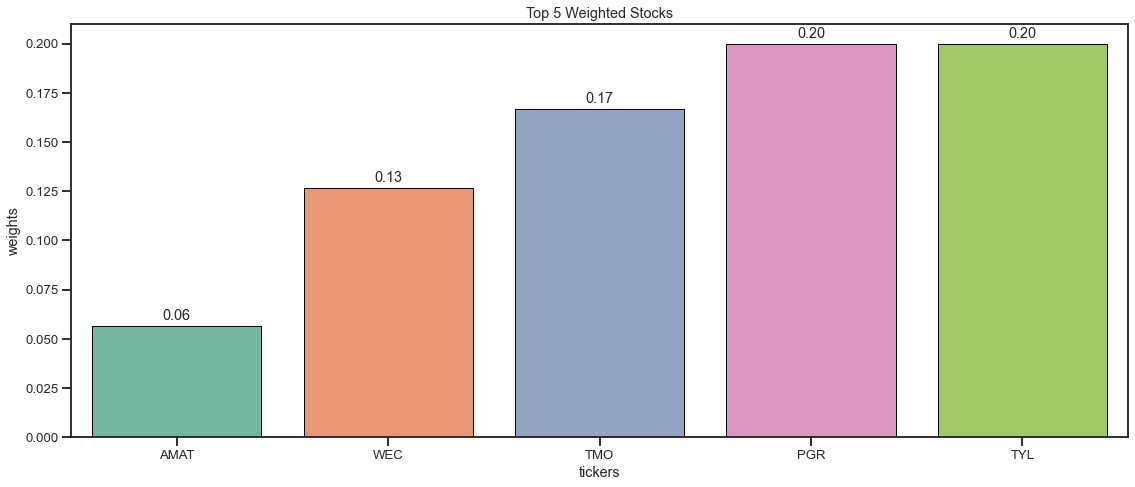

In [16]:
plot_allocation(random_vol_port1, n=5)

### Sector distribution

In [18]:
# Get sector info using Quandl API. Incorporating this into Portfolio() as well.
api_key = ''
quandl.ApiConfig.api_key = api_key

attr_table = quandl.get_table('SHARADAR/TICKERS', ticker=list(sample1.columns), paginate=True)
attr = attr_table[attr_table.ticker.duplicated(keep='first')]

In [20]:
attr.head(2)

,table,permaticker,ticker,name,exchange,isdelisted,category,cusips,siccode,sicsector,...,currency,location,lastupdated,firstadded,firstpricedate,lastpricedate,firstquarter,lastquarter,secfilings,companysite
None,,,,,,,,,,,,,,,,,,,,,
30,SEP,195812,ABC,Amerisourcebergen Corp,NYSE,N,Domestic Common Stock,03073E105 03071P102,5122,Wholesale Trade,...,USD,Pennsylvania; U.S.A,2021-01-25,2014-11-01,1995-04-04,2021-01-25,1996-12-31,2020-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.amerisourcebergen.com
31,SEP,199948,AMAT,Applied Materials Inc,NASDAQ,N,Domestic Common Stock,038222105,3674,Manufacturing,...,USD,California; U.S.A,2021-01-25,2014-09-23,1986-01-01,2021-01-25,1996-09-30,2020-09-30,https://www.sec.gov/cgi-bin/browse-edgar?actio...,http://www.appliedmaterials.com


In [21]:
stocks_missing_attr = set(sample1.columns) - set(attr.ticker)

print('There are {} stock(s) {} missing attributes.'.format(len(stocks_missing_attr), stocks_missing_attr))

There are 0 stock(s) set() missing attributes.


In [24]:
def plot_sector(attributes, palette='Pastel1'):

    sector_ratio = attributes.sicsector.value_counts(normalize=True)
    
    sector_labels = ['\n'.join(textwrap.wrap(label.replace(' And', ','), width=15)) \
                 for label in sector_ratio.index]
    
    plt.figure(figsize=(6,6))
    plt.pie(sector_ratio, labels=sector_labels, startangle=90,
            autopct='%0.f%%', pctdistance=0.85, colors=sns.color_palette(palette).as_hex()) # textprops={'horizontalalignment': 'left'})

    circle = plt.Circle((0,0),0.7, fc='white') 
    donut = plt.gcf()
    donut.gca().add_artist(circle)

    # plt.tight_layout()
    plt.show()

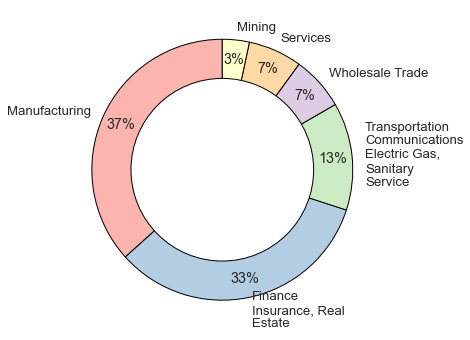

In [25]:
plot_sector(attr)

Below is an example from an interactive version I am also working on. It shows sector representation for three portfolios. I am planning to add additional information like sector returns, etc.

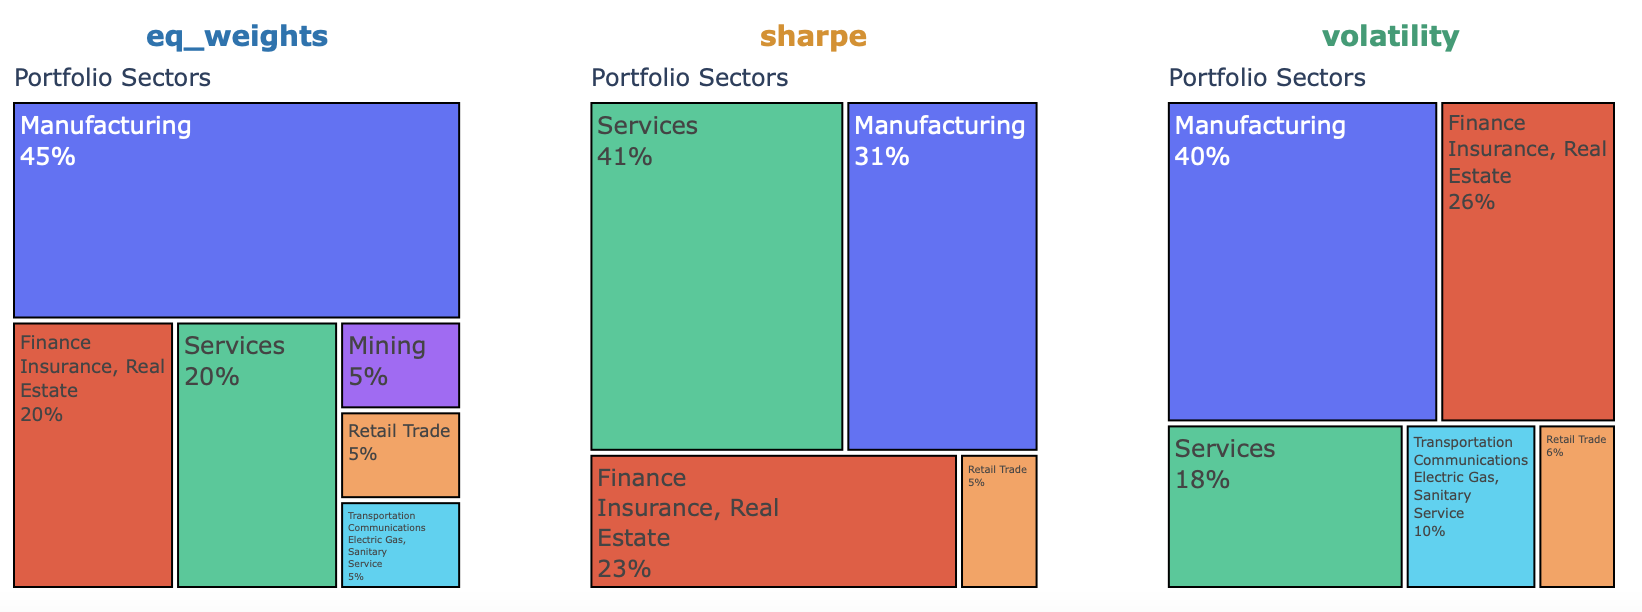

In [43]:
Image(filename = 'Plotly_Sectors.png', width=900)

### Worst/best performing stocks

In [26]:
def plot_stock_perf(portfolio_result, n=5):
    
    best_perf = portfolio_result['stocks_annualized_returns'][:n][::-1]
    worst_perf = portfolio_result['stocks_annualized_returns'][-n:][::-1]
    stock_perf = worst_perf.append(best_perf)
    
    plt.figure(figsize=(16,7))
    
    sns.barplot(x=stock_perf.index, y=stock_perf, palette='PiYG')
    
    text_palette = sns.color_palette('PiYG').as_hex()

    # Change below to function.
    for i,txt in enumerate(stock_perf):
        
        if stock_perf[i] >= 0:
            offset = 10
            text_color = text_palette[-1] # '#355749'
        else:
            offset = -15
            text_color = text_palette[0] # '#A41034'
            
        plt.annotate('{:.2f}'.format(txt), # * 100
                     xy=(i, stock_perf[i]),
                     xytext=(0, offset),
                     textcoords='offset points',
                     va='center', ha='center', c=text_color)
    
    # plt.ylim([stock_perf.min() * 1.2, stock_perf.max() * 1.1])
    
    plt.title('Worst/Best Stock by Returns')
    plt.ylabel('annualized returns')
    
    plt.tight_layout()
    plt.show()

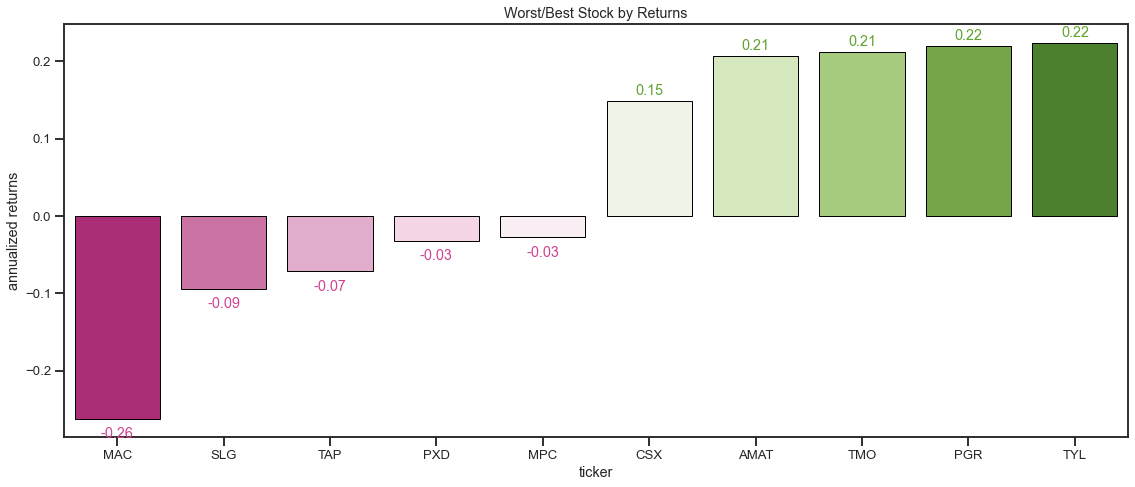

In [27]:
plot_stock_perf(random_vol_port1)

### Portfolio sharpe ratio

Another plot I might want to add to the upper right is something that shows portfolio return/volatility.

The image below is from the interactive version I am working on. It shows returns/volatility and sharpe ratio as markersize of portfolios

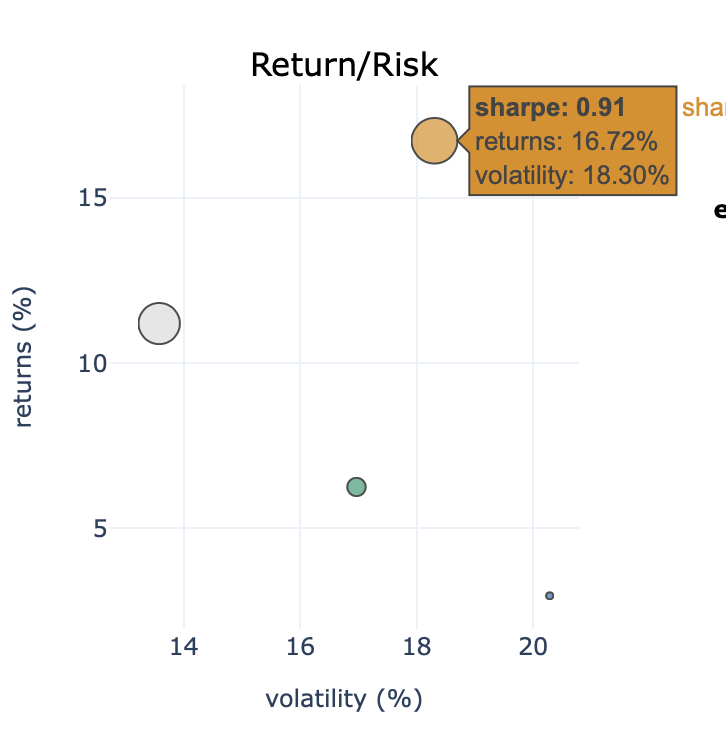

In [46]:
Image(filename = 'Plotly_Sharpe.png', width=400) 